In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
#Read the data
startups = pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Multiple Linear Regression\\50_Startups.csv",encoding='latin1')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups=startups.drop(['State'],axis=1)

In [6]:
startups

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
Startups=startups.rename({'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'},axis=1)

In [11]:
Startups.head()

,RDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [13]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=Startups).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        15:28:14   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
rsq_rd = smf.ols('RDSpend~Administration+MarketingSpend',data=Startups).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_admin = smf.ols('Administration~RDSpend+MarketingSpend',data=Startups).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_ms = smf.ols('MarketingSpend~Administration+RDSpend',data=Startups).fit().rsquared  
vif_ms = 1/(1-rsq_ms)


# Storing vif values in a data frame
d1 = {'Variables':['RDSpend','Administration','MarketingSpend'],'VIF':[vif_rd,vif_admin,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDSpend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


In [16]:
m1 = smf.ols('Profit~MarketingSpend',data=Startups).fit()
m1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           4.38e-10
Time:                        15:30:40   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
m2 = smf.ols('Profit~Administration',data=Startups).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 15 Jan 2021   Prob (F-statistic):              0.162
Time:                        15:31:12   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
m2 = smf.ols('Profit~Administration+MarketingSpend',data=Startups).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           2.50e-10
Time:                        15:31:43   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
MarketingSpend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
Startups1=Startups.drop(['Administration'],axis=1)

In [20]:
Startups1

,RDSpend,MarketingSpend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [21]:
k = Startups1.shape[1]
n = Startups1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.24

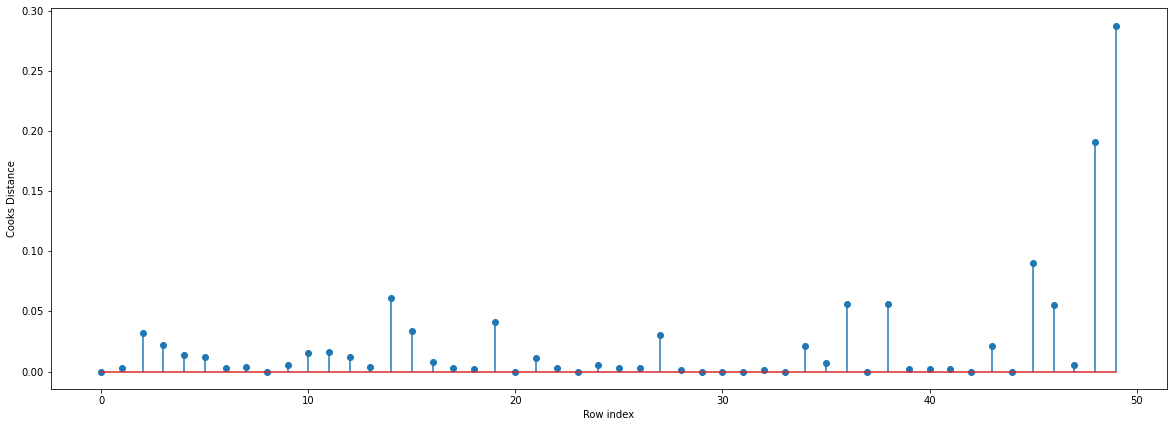

In [22]:
#Plot the influencers values using stem plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startups1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
#index and value of influencer where c is more than .24
(np.argmax(c),np.max(c))

(49, 0.28808229275432623)

In [24]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Startups2=Startups1.drop(Startups1.index[[49]],axis=0).reset_index()

In [25]:
#Drop the original index

Startups2=Startups2.drop(['index'],axis=1)

In [26]:
Startups2

,RDSpend,MarketingSpend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [28]:
fmodel = smf.ols('Profit~RDSpend+MarketingSpend',data=Startups2).fit()


In [29]:
fmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           3.74e-33
Time:                        15:36:40   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDSpend            0.7754      0.035     22.136      0.000       0.705       0.846
MarketingSpend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# split the data into train and test

from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(Startups2,test_size=0.2)

In [34]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))
  
def MAPE(pred,actual):
      return np.mean((np.abs(actual-pred)/actual))*100

In [36]:
#train the model using training data
train_model=smf.ols('Profit~RDSpend+MarketingSpend',data= train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Profit
errors_train=predtrain-actualtrain
mape_train=MAPE(predtrain,actualtrain)
mape_train


6.3072220038344655

In [37]:
predtest=train_model.predict(test_data)
actualtest=test_data.Profit

mape_test=MAPE(predtest,actualtest)
mape_test

6.656893903029585

In [39]:
from sklearn.preprocessing import StandardScaler

array=Startups2.values
scaler=StandardScaler().fit(Startups2)
rescaledX=scaler.transform(Startups2)

In [40]:
data1 = pd.DataFrame(rescaledX,columns=['RDSpend','MarketingSpend','Profit'])
data1

,RDSpend,MarketingSpend,Profit
0,2.018325,2.146120,2.071556
1,1.956704,1.913596,2.059122
2,1.751650,1.613709,2.039490
3,1.548545,1.407457,1.823808
4,1.497818,1.265442,1.381401
5,1.268706,1.237866,1.137968
6,1.330036,-0.722891,1.114977
7,1.233349,0.912791,1.105185
8,1.014870,0.810533,1.011462
9,1.077405,0.755234,0.946565


In [41]:
train_model=smf.ols('Profit~RDSpend+MarketingSpend',data= train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Profit
errors_train=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
rmse_train

7221.958955144288

In [42]:
predtest=train_model.predict(test_data)
actualtest=test_data.Profit

rmse_test=RMSE(predtest,actualtest)
rmse_test

8409.877440988615